# Imports

In [1]:
# evaluates each line in a single output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np

from datetime import datetime

# import our classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# import sklearn utilities
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# plotting config
sns.set(style="darkgrid")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.rc('figure', figsize=(12,8))
plt.rc('lines', markersize=4)
plt.rc('font', size=30)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)
plt.rc('figure', titlesize=20)
plt.rcParams["figure.autolayout"] = True

# Metric Utils

In [2]:
from metrics_util import metrics_calc, metrics_plot

In [4]:
print(metrics_calc.__doc__)

Calculates all classifier relevant metrics, including adjusted ones to imbalanced classes.

    Args:
        y_test: test data
        y_pred: predicted data

    Returns:
        list[pd.DataFrame]: [metrics, metrics per class]
    


In [125]:
print(metrics_plot.__doc__)

Plots in a grid, the ROC Curve the Precision-Recall Curve and the Confusion Matrix of a classifier.

    Args:
        cls (BaseEstimator): A trained classifier.
        X_test (pd.DataFrame): Independent test data.
        y_test (pd.DataFrame): Dependent test data.

    Returns:
        plt.Figure: A plt.subplot figure object containing 3 plots(ROC,PRC,Conf Matrix)
    


A note on our metrics_calc and metrics_plot functions:

These functions will be crucial in evaluating our models. Not all metrics have the same importance when dealing with imbalanced classes as we will see.

The most important metrics are those that either work better with large data or somehow take into account the imbalance in data. These include **balanced_accuracy_score**, **average_precision_score**, **precision_recall_fscore_support**, **cohen_kappa_score** and **matthews_corrcoef**. The rest metrics are included for the sake of completeness and contrast.

- **accuracy_score:** the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
---
- **precision_score:** The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. 
  - A measure of a classifiers exactness.
  - The best value is 1 and the worst value is 0.
---
- **recall_score:** The recall is intuitively the ability of the classifier to find all the positive samples.
  - A measure of a classifiers completeness.
  - The best value is 1 and the worst value is 0.
---
- **f1_score:** The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
---
- **balanced_accuracy_score:** The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class. The best value is 1 and the worst value is 0 when
---
- **average_precision_score:** Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.
---
- **roc_auc_score:** Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
---
- **precision_recall_fscore_support:** Computes precision, recall, F-measure and support for each class.
---
- **cohen_kappa_score:** Classification accuracy normalized by the imbalance of the classes in the data.
  - The kappa score is a number between -1 and 1. Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).
---
- **matthews_corrcoef:** Is a measure of the quality of binary and multiclass classifications. A balanced measure which can be used even if the classes are of very different sizes.
  - The MCC is in essence a correlation coefficient value between -1 and +1. 
  - A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.

# 1. Abstract

## Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. In this project, the dataset contains transactions made by credit cards in September 2013 by European cardholders. This [famous dataset from kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), contains transactions that occurred in two days, that include 492 frauds out of 284,807 transactions.

## Goal

The goal is to create bi-classification models based on the Logistic Regression, K Nearest Neighbors and Support Vector Machines in order to be able to predict fraudulent cases. In the process, we will find which one is optimal for this class-imbalanced dataset.

# 2. Data

## 2.1 Description

The dataset contains only numerical input variables which are the result of a PCA transformation. 

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## 2.2 Exploratory Data Analysis

We will explore our data using standard statistical methods and plots. The data is already cleaned up so there will be no need for cleaning or feature engineering.

In [3]:
df = pd.read_csv('creditcard.csv')
df.index = df.index + 1

All data is numerical, thus we don't need to preprocess the dtypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 1 to 284807
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The amount of the transactions has the least variety

In [4]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check for null or nan values

In [20]:
df.isnull().values.any()

False

In [21]:
df.isna().values.any()

False

In [19]:
df.loc[:, 'Class'].value_counts()
f'Fradulent transactions are {round(df.loc[:, "Class"].value_counts()[1]*100/len(df),2)}% of the total dataset'

'Fradulent transactions are 0.17% of the total dataset'

This is clearly a heavily inbalanced biclassification problem. This type of situation leads to the so called [**Accuracy Paradox**](https://en.wikipedia.org/wiki/Accuracy_paradox).

The essence of the paradox is that although the accuracy of the model (for the dominant class) is very high, it does not help with the predictive power of the model. 

There are times when it might be better to have lower accuracy in order to increase the predictive potency of the model. This effect may become more severe if no proper treatment of this imbalance takes place. 

The proper treatment includes techniques such as scaling the data, sampling techniques and (hyper)parameter tuning. We will mostly proble the data scaling techniques.

Let us first check some statistics for normal and fraudulent cases

- non-fraudulent, they are highly non Gaussian with super bulky tails and the mean is much lower than std

In [22]:
df[df.Class==0].Amount.agg(['mean', 'std', 'skew', 'kurt'])

mean     88.291022
std     250.105092
skew     17.003147
kurt    846.736996
Name: Amount, dtype: float64

- fradulent, they are not severely non Gaussian,  the mean is half the std

In [23]:
df[df.Class==1].Amount.agg(['mean', 'std', 'skew', 'kurt'])

mean    122.211321
std     256.683288
skew      3.754477
kurt     17.745687
Name: Amount, dtype: float64

Since both classes are highly non normal, when we preprocess the data we will test both MinMaxScaler and StandardScaler.
- MinMaxScaler does not distort the form of the data.
- StandardScaler highly distorts the form data. As a matter of fact it casts it into a Gaussian like manner, having mean=0 and std=1.
  - Many [algorithms](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) work best with this type of transformation since they expect some kind of Gaussian form for the data.

<AxesSubplot:xlabel='Class', ylabel='Amount'>

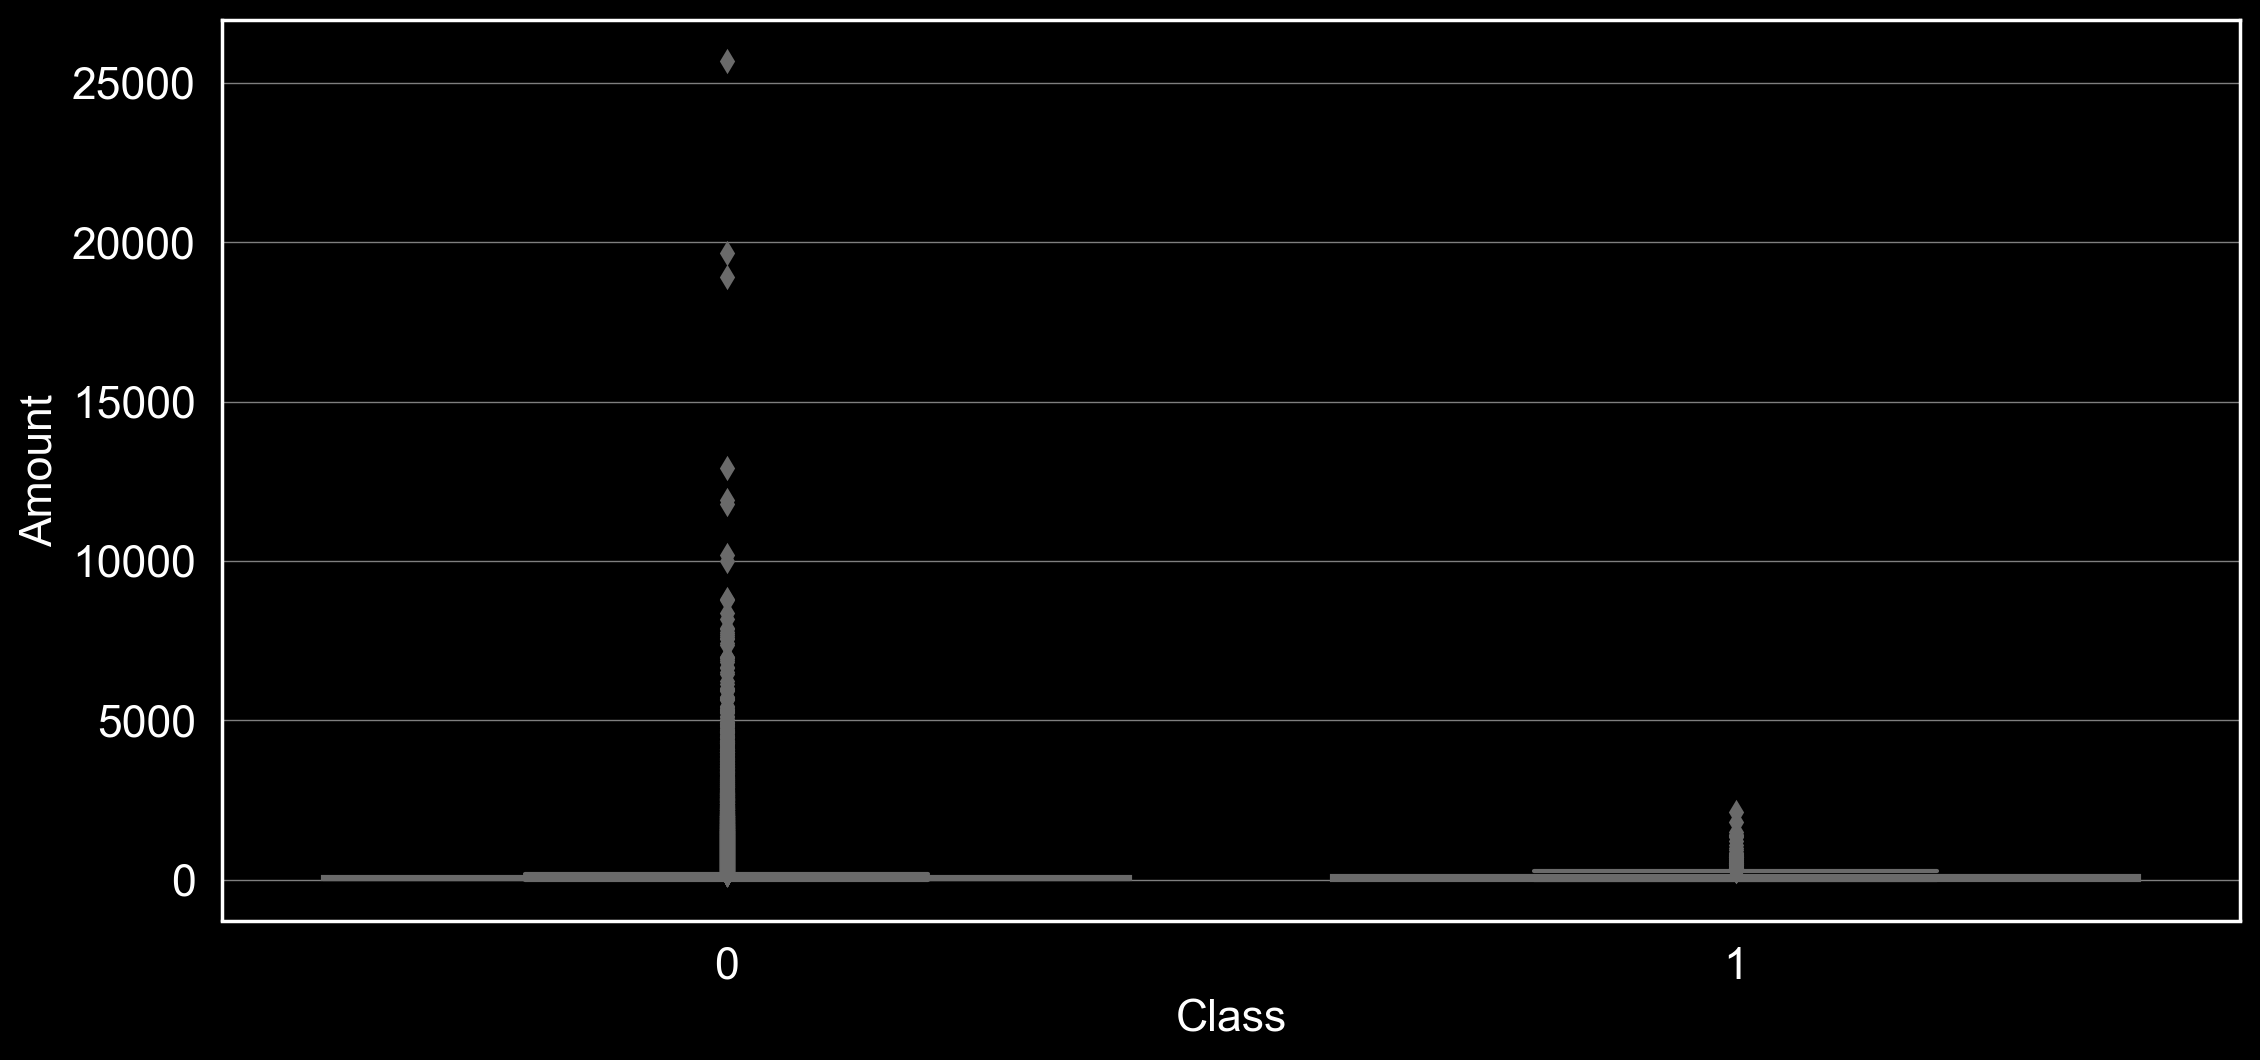

In [29]:
plt.figure(figsize=(12,6), dpi=200)
sns.boxplot(data=df, x='Class',y='Amount')

The box indicates the mean value of the amount and the line indicates the standard deviation

<AxesSubplot:xlabel='Class', ylabel='Amount'>

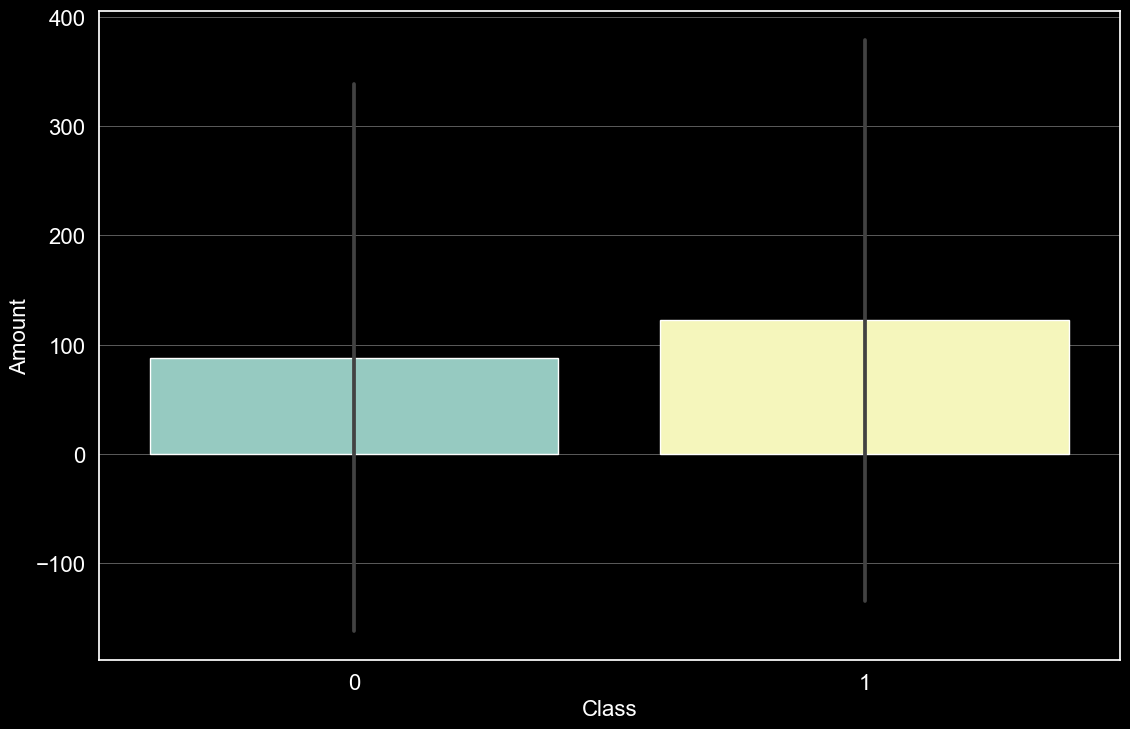

In [30]:
sns.barplot(data=df, x='Class', y='Amount', estimator=np.mean, errorbar='sd')

We observe that the fraudulent cases have a higher mean, which is something logical. Nevertheless, the standard deviation of both classses is practically the same.

## 2.2 Preprocessing

Finally, we define as y the Class columns and all the rest features are packed in X

In [4]:
X = df.drop('Class', axis=1)
y = df.loc[:, 'Class']

We perform a standard train and split with 10% test data.

Since data is highly imbalanced we also use the stratify=True option in order to keep the percentage of classes the same.

Always first split the data and then transform/fit in order to avoid data leakage.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

Let's check the shapes and ratios of X and y. 

In [87]:
X_train.shape
X_train.shape

(227845, 30)

(227845, 30)

As expected 80% train data

In [88]:
X_train.shape[0]/X.shape[0]
X_train.shape[0]/X.shape[0]

0.7999978933102065

0.7999978933102065

As expected 20% test data

In [89]:
X_test.shape
X_test.shape

(56962, 30)

(56962, 30)

In [90]:
X_test.shape[0]/X.shape[0]
X_test.shape[0]/X.shape[0]

0.20000210668979343

0.20000210668979343

The 0, 1 values of our classes have been correctly and proportionally split into 80% in the train set and 20% in the test set.

In [102]:
y_train.value_counts()/y.value_counts()

0    0.799996
1    0.800813
Name: Class, dtype: float64

In [101]:
y_test.value_counts()/y.value_counts()

0    0.200004
1    0.199187
Name: Class, dtype: float64

Also only fit the train data and just transform the test data to avoid again data leakage.

In [6]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()
transformers = [('minmax', scaler_minmax), ('standard', scaler_standard)]
Input = {
    f'{name}':
        {
            f'X_train': transformer.fit_transform(X_train),
            f'X_test': transformer.transform(X_test)
        } 
    for name, transformer in transformers    
}

We packed all the input data into the Input dictionary, which can be arbitrarily expanded with any scalers.

In [92]:
Input.keys()

dict_keys(['minmax', 'standard'])

In [93]:
Input['minmax'].keys()
Input['standard'].keys()

dict_keys(['X_train', 'X_test'])

dict_keys(['X_train', 'X_test'])

In [94]:
Input['minmax']['X_train'].shape
Input['standard']['X_train'].shape

(227845, 30)

(227845, 30)

As expected 80% train data

In [95]:
Input['minmax']['X_train'].shape[0]/X.shape[0]
Input['standard']['X_train'].shape[0]/X.shape[0]

0.7999978933102065

0.7999978933102065

As expected 20% test data

In [96]:
Input['minmax']['X_test'].shape
Input['standard']['X_test'].shape

(56962, 30)

(56962, 30)

In [97]:
Input['minmax']['X_test'].shape[0]/X.shape[0]
Input['standard']['X_test'].shape[0]/X.shape[0]

0.20000210668979343

0.20000210668979343

# 3. Classifier Analysis

## 3.1 Logistic Regression

In [142]:
log_reg_minmax = LogisticRegression()
log_reg_standard = LogisticRegression()

In [143]:
log_reg_minmax.fit(X=Input['minmax']['X_train'], y=y_train)
log_reg_standard.fit(X=Input['standard']['X_train'], y=y_train)

LogisticRegression()

LogisticRegression()

In [144]:
pred_log_reg_minmax = log_reg_minmax.predict(X=Input['minmax']['X_test'])
pred_log_reg_standard = log_reg_standard.predict(X=Input['standard']['X_test'])

In [145]:
metric_log_reg_minmax = metrics_calc(y_test=y_test, y_pred=pred_log_reg_minmax, clsfr='log_reg_minmax')

In [146]:
metric_log_reg_standard = metrics_calc(y_test=y_test, y_pred=pred_log_reg_standard, clsfr='log_reg_standard')

In [147]:
metric_log_reg = pd.concat([metric_log_reg_minmax[0], metric_log_reg_standard[0]], axis=1)
metric_log_reg

,log_reg_minmax,log_reg_standard
Cls Metrics,,
Accuracy,1.00,1.00
Precision,0.90,0.90
Recall,0.55,0.62
f1,0.68,0.73
Bal Accuracy,0.78,0.81
Av Precision,0.50,0.56
AUC,0.78,0.81
Matthews CC,0.70,0.75
Cohen KS,0.68,0.73


In [148]:
metric_log_reg_class = pd.concat([metric_log_reg_minmax[1], metric_log_reg_standard[1]], axis=1)
metric_log_reg_class

log_reg_minmax        log_reg_standard       
                                   0      1                0      1
Cls Metrics Per Class                                              
Precision                        1.0   0.90              1.0   0.90
Recall                           1.0   0.55              1.0   0.62
f1                               1.0   0.68              1.0   0.73
Support                      56864.0  98.00          56864.0  98.00

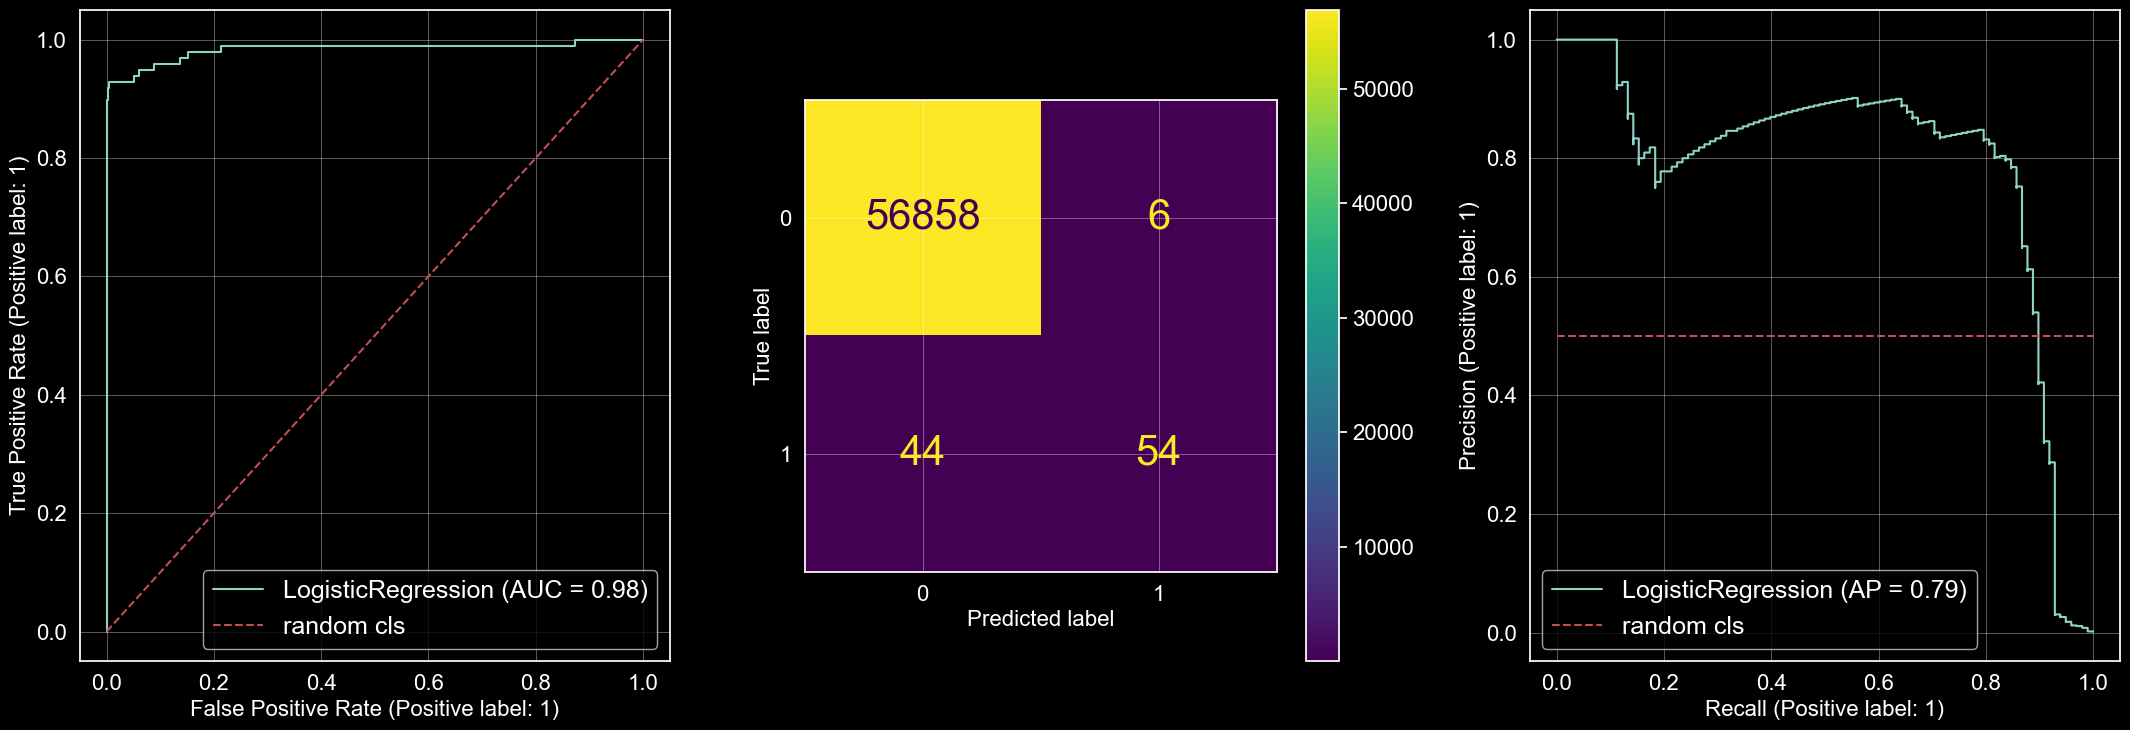

In [191]:
metrics_plot(cls=log_reg_minmax, X_test=Input['minmax']['X_test'], y_test=y_test);

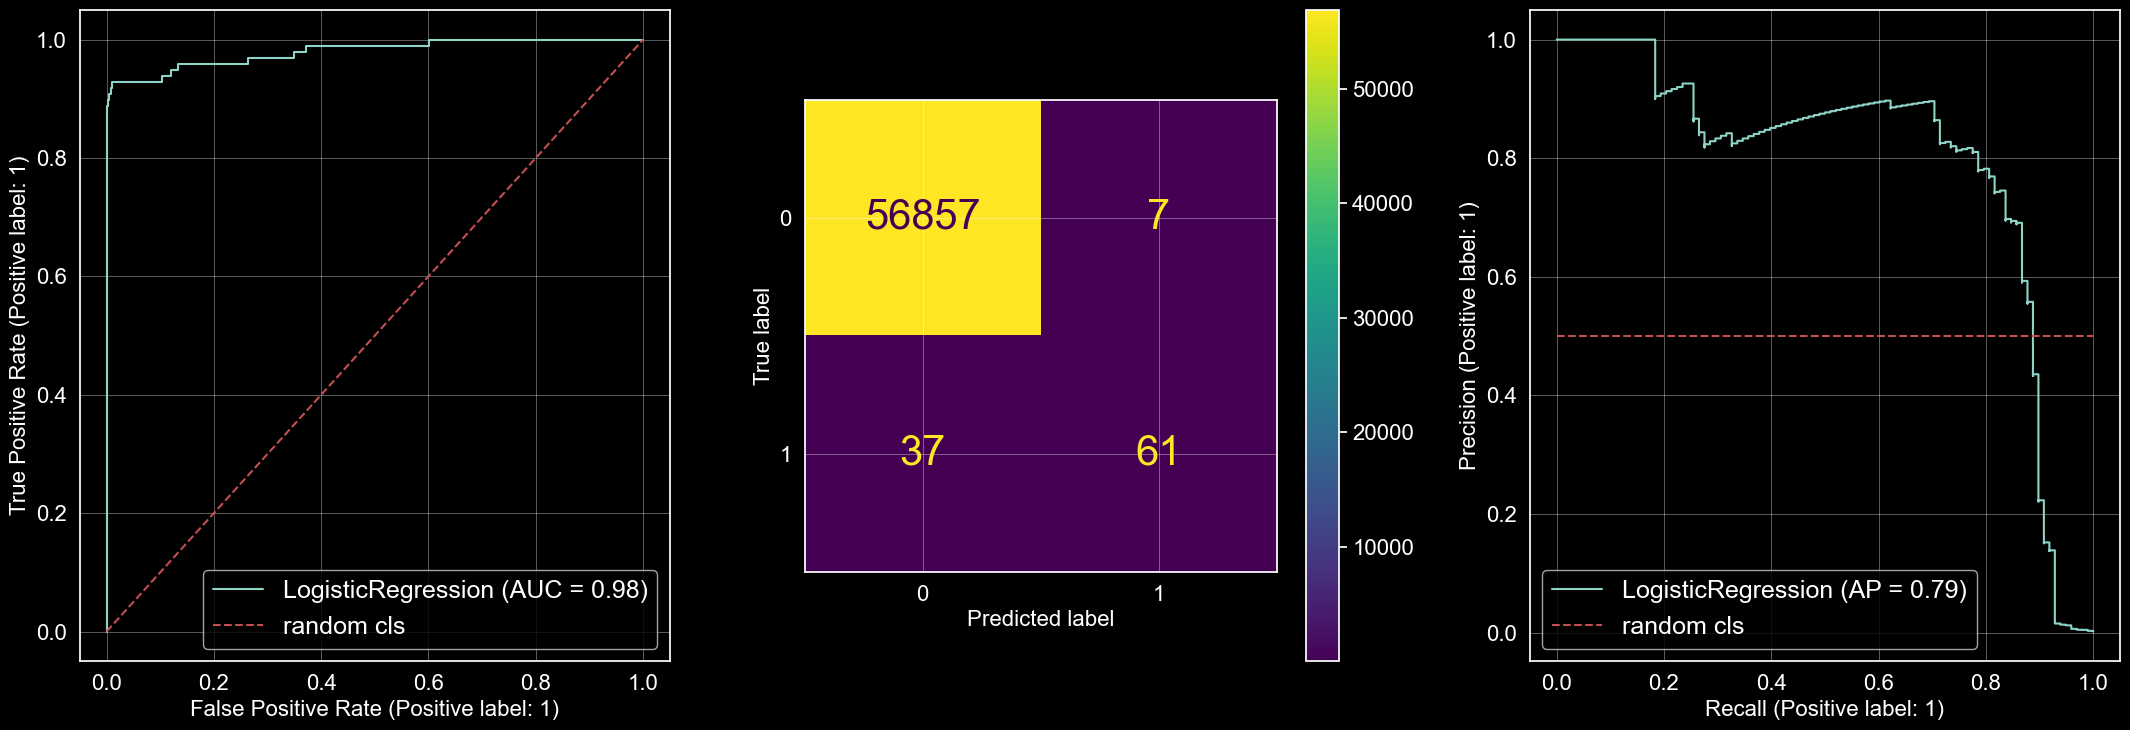

In [192]:
metrics_plot(cls=log_reg_standard, X_test=Input['standard']['X_test'], y_test=y_test);

## 3.2 KNN

### Optimize KNN for MinMaxed Input (k=5)

In [47]:
max_k = 50
metrics_knn_minmax = []
metrics_class_knn_minmax = []

for k in range(1, max_k + 1):
    
    # print out times for each k
    print(f"[{datetime.now().strftime('%X')}]: {k=}")
    
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn = knn.fit(Input['minmax']['X_train'], y_train)
    y_pred = knn.predict(Input['minmax']['X_test'])
    
    # save metric scores
    metrics_knn_minmax += [metrics_calc(y_test, y_pred, clsfr=k)[0]]
    metrics_class_knn_minmax += [metrics_calc(y_test, y_pred, clsfr=k)[1]]

metrics_knn_minmax = pd.concat(metrics_knn_minmax, axis=1)

metrics_class_knn_minmax = pd.concat(metrics_class_knn_minmax, axis=1).drop('Support')

# keep only the fraudulent class since the other is trivial in explanation and scores
mask = metrics_class_knn_minmax.columns.get_level_values(1) == 1
metrics_class_knn_minmax = metrics_class_knn_minmax.loc[:, mask]

[14:22:01]: k=1
[14:22:19]: k=2
[14:22:36]: k=3
[14:22:53]: k=4
[14:23:09]: k=5
[14:23:26]: k=6
[14:23:43]: k=7
[14:23:59]: k=8
[14:24:14]: k=9
[14:24:32]: k=10
[14:24:52]: k=11
[14:25:10]: k=12
[14:25:29]: k=13
[14:25:47]: k=14
[14:26:05]: k=15
[14:26:24]: k=16
[14:26:43]: k=17
[14:27:02]: k=18
[14:27:21]: k=19
[14:27:40]: k=20
[14:27:58]: k=21
[14:28:16]: k=22
[14:28:34]: k=23
[14:28:52]: k=24
[14:29:10]: k=25
[14:29:28]: k=26
[14:29:45]: k=27
[14:30:04]: k=28
[14:30:23]: k=29
[14:30:40]: k=30
[14:30:58]: k=31
[14:31:16]: k=32
[14:31:34]: k=33
[14:31:52]: k=34
[14:32:10]: k=35
[14:32:28]: k=36
[14:32:47]: k=37
[14:33:04]: k=38
[14:33:23]: k=39
[14:33:42]: k=40
[14:33:59]: k=41
[14:34:17]: k=42
[14:34:34]: k=43
[14:34:53]: k=44
[14:35:11]: k=45
[14:35:28]: k=46
[14:35:45]: k=47
[14:36:03]: k=48
[14:36:21]: k=49
[14:36:39]: k=50


In [50]:
metrics_knn_minmax.T.head()

Cls Metrics,Accuracy,Precision,Recall,f1,Bal Accuracy,Av Precision,AUC,Matthews CC,Cohen KS
1,1.0,0.90,0.83,0.86,0.91,0.74,0.91,0.86,0.86
2,1.0,0.99,0.74,0.85,0.87,0.74,0.87,0.86,0.85
3,1.0,0.95,0.85,0.90,0.92,0.81,0.92,0.90,0.90
4,1.0,0.99,0.83,0.90,0.91,0.82,0.91,0.90,0.90
5,1.0,0.99,0.84,0.91,0.92,0.83,0.92,0.91,0.91


[Text(0.5, 0, 'Num of Neighbors'), Text(0, 0.5, 'Metrics')]

Text(0.5, 1.0, 'KNN Metrics')

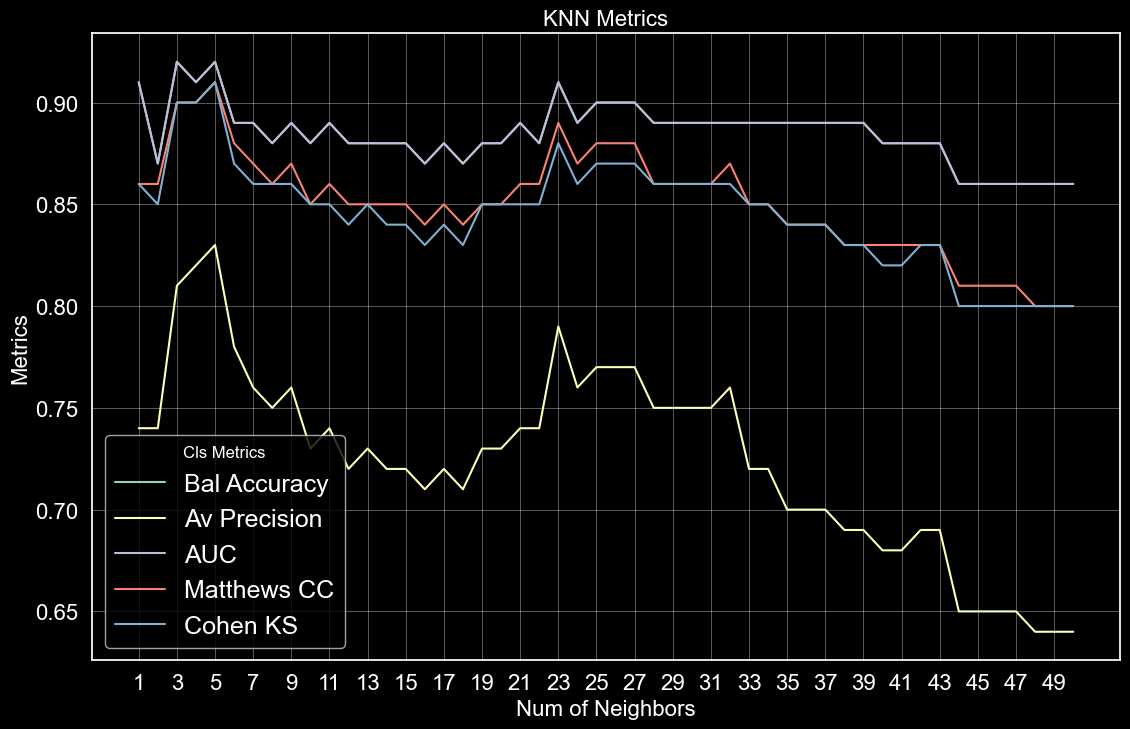

In [51]:
ax = metrics_knn_minmax.iloc[4:].T.plot()
ax.set(xlabel='Num of Neighbors', ylabel='Metrics')
ax.set_xticks(range(1, max_k, 2))
# plt.ylim((0.85, 1))
plt.title('KNN Metrics')

In [53]:
metrics_class_knn_minmax.droplevel(1, axis=1).T.head()

Cls Metrics Per Class,Precision,Recall,f1
1,0.90,0.83,0.86
2,0.99,0.74,0.85
3,0.95,0.85,0.90
4,0.99,0.83,0.90
5,0.99,0.84,0.91


[Text(0.5, 0, 'Num of Neighbors'), Text(0, 0.5, 'Metrics')]

Text(0.5, 1.0, 'KNN Metrics per class for Fraudulent case')

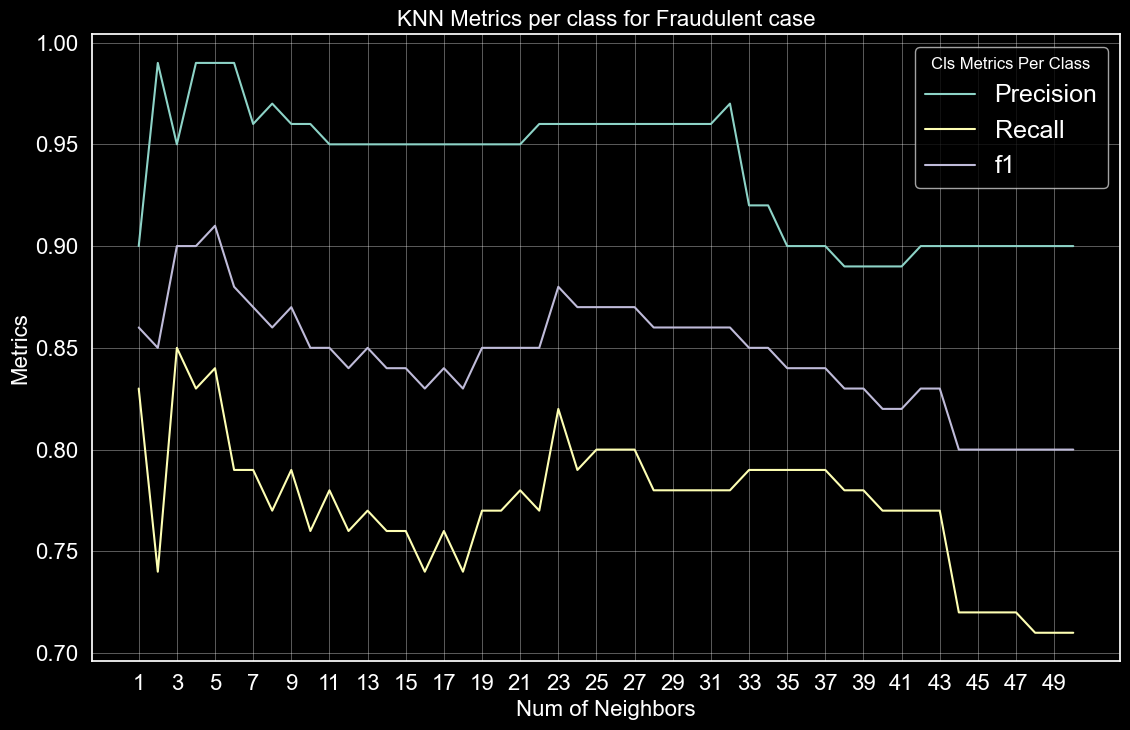

In [54]:
ax = metrics_class_knn_minmax.droplevel(1, axis=1).T.plot()
ax.set(xlabel='Num of Neighbors', ylabel='Metrics')
ax.set_xticks(range(1, max_k, 2))
# plt.ylim((0.85, 1))
plt.title('KNN Metrics per class for Fraudulent case')

It turns out that for both sets of metrics k=5 is the optimal value, which is also the default value.

In [55]:
metrics_knn_minmax.iloc[4:].T.iloc[4]

Cls Metrics
Bal Accuracy    0.92
Av Precision    0.83
AUC             0.92
Matthews CC     0.91
Cohen KS        0.91
Name: 5, dtype: float64

In [56]:
metrics_class_knn_minmax.droplevel(1, axis=1).T.iloc[4]

Cls Metrics Per Class
Precision    0.99
Recall       0.84
f1           0.91
Name: 5, dtype: float64

### Optimize KNN for Standardized Input (k=3)

In [57]:
max_k = 50
metrics_knn_standard = []
metrics_class_knn_standard = []

for k in range(1, max_k + 1):
    
    # print out times for each k
    print(f"[{datetime.now().strftime('%X')}]: {k=}")
    
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn = knn.fit(Input['standard']['X_train'], y_train)
    y_pred = knn.predict(Input['standard']['X_test'])
    
    # save metric scores
    metrics_knn_standard += [metrics_calc(y_test, y_pred, clsfr=k)[0]]
    metrics_class_knn_standard += [metrics_calc(y_test, y_pred, clsfr=k)[1]]

metrics_knn_standard = pd.concat(metrics_knn_standard, axis=1)

metrics_class_knn_standard = pd.concat(metrics_class_knn_standard, axis=1).drop('Support')

# keep only the fraudulent class since the other is trivial in explanation and scores
mask = metrics_class_knn_standard.columns.get_level_values(1) == 1
metrics_class_knn_standard = metrics_class_knn_standard.loc[:, mask]

[14:41:01]: k=1
[14:41:18]: k=2
[14:41:35]: k=3
[14:41:53]: k=4
[14:42:10]: k=5
[14:42:28]: k=6
[14:42:46]: k=7
[14:43:02]: k=8
[14:43:19]: k=9
[14:43:37]: k=10
[14:43:55]: k=11
[14:44:12]: k=12
[14:44:29]: k=13
[14:44:47]: k=14
[14:45:04]: k=15
[14:45:21]: k=16
[14:45:38]: k=17
[14:45:53]: k=18
[14:46:08]: k=19
[14:46:24]: k=20
[14:46:39]: k=21
[14:46:54]: k=22
[14:47:10]: k=23
[14:47:26]: k=24
[14:47:41]: k=25
[14:47:57]: k=26
[14:48:12]: k=27
[14:48:27]: k=28
[14:48:43]: k=29
[14:48:58]: k=30
[14:49:14]: k=31
[14:49:29]: k=32
[14:49:45]: k=33
[14:50:00]: k=34
[14:50:16]: k=35
[14:50:31]: k=36
[14:50:47]: k=37
[14:51:02]: k=38
[14:51:18]: k=39
[14:51:33]: k=40
[14:51:48]: k=41
[14:52:04]: k=42
[14:52:20]: k=43
[14:52:36]: k=44
[14:52:51]: k=45
[14:53:07]: k=46
[14:53:22]: k=47
[14:53:38]: k=48
[14:53:53]: k=49
[14:54:09]: k=50


In [58]:
metrics_knn_standard.T.head()

Cls Metrics,Accuracy,Precision,Recall,f1,Bal Accuracy,Av Precision,AUC,Matthews CC,Cohen KS
1,1.0,0.89,0.86,0.88,0.93,0.77,0.93,0.87,0.87
2,1.0,0.98,0.82,0.89,0.91,0.80,0.91,0.89,0.89
3,1.0,0.96,0.88,0.91,0.94,0.84,0.94,0.92,0.91
4,1.0,0.95,0.86,0.90,0.93,0.82,0.93,0.90,0.90
5,1.0,0.94,0.87,0.90,0.93,0.82,0.93,0.90,0.90


[Text(0.5, 0, 'Num of Neighbors'), Text(0, 0.5, 'Metrics')]

Text(0.5, 1.0, 'KNN Metrics')

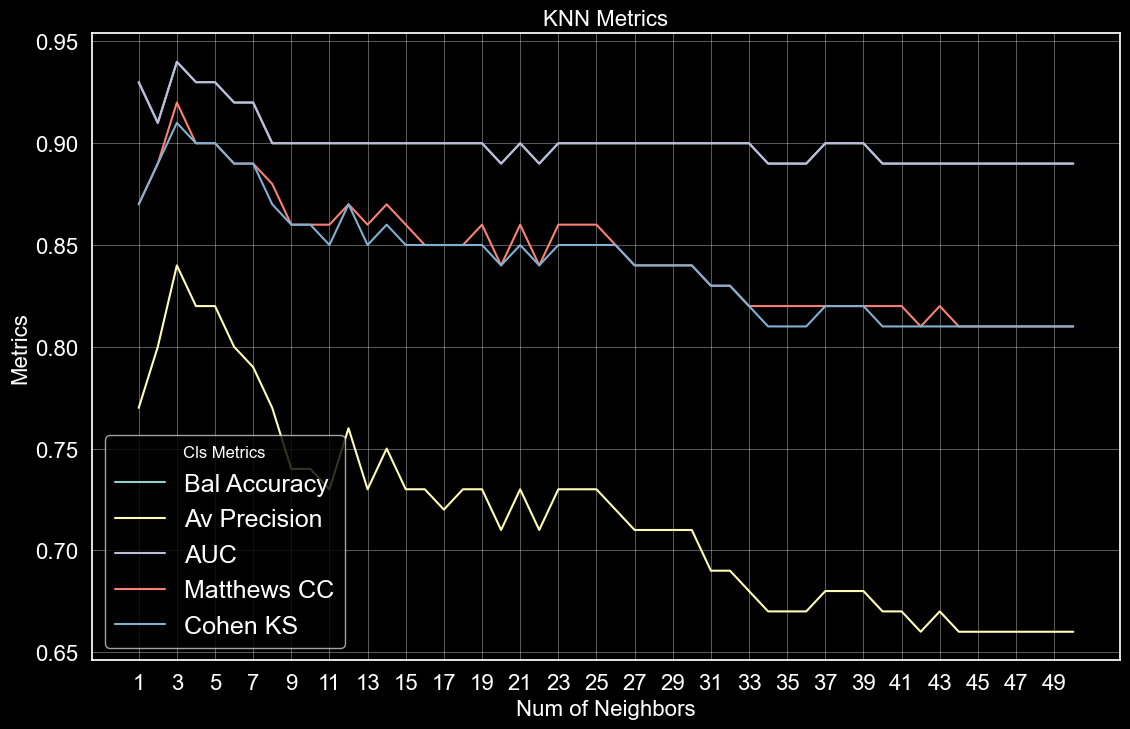

In [59]:
ax = metrics_knn_standard.iloc[4:].T.plot()
ax.set(xlabel='Num of Neighbors', ylabel='Metrics')
ax.set_xticks(range(1, max_k, 2))
# plt.ylim((0.85, 1))
plt.title('KNN Metrics')

In [61]:
metrics_class_knn_standard.droplevel(1, axis=1).T.head()

Cls Metrics Per Class,Precision,Recall,f1
1,0.89,0.86,0.88
2,0.98,0.82,0.89
3,0.96,0.88,0.91
4,0.95,0.86,0.90
5,0.94,0.87,0.90


[Text(0.5, 0, 'Num of Neighbors'), Text(0, 0.5, 'Metrics')]

Text(0.5, 1.0, 'KNN Metrics per class for Fraudulent case')

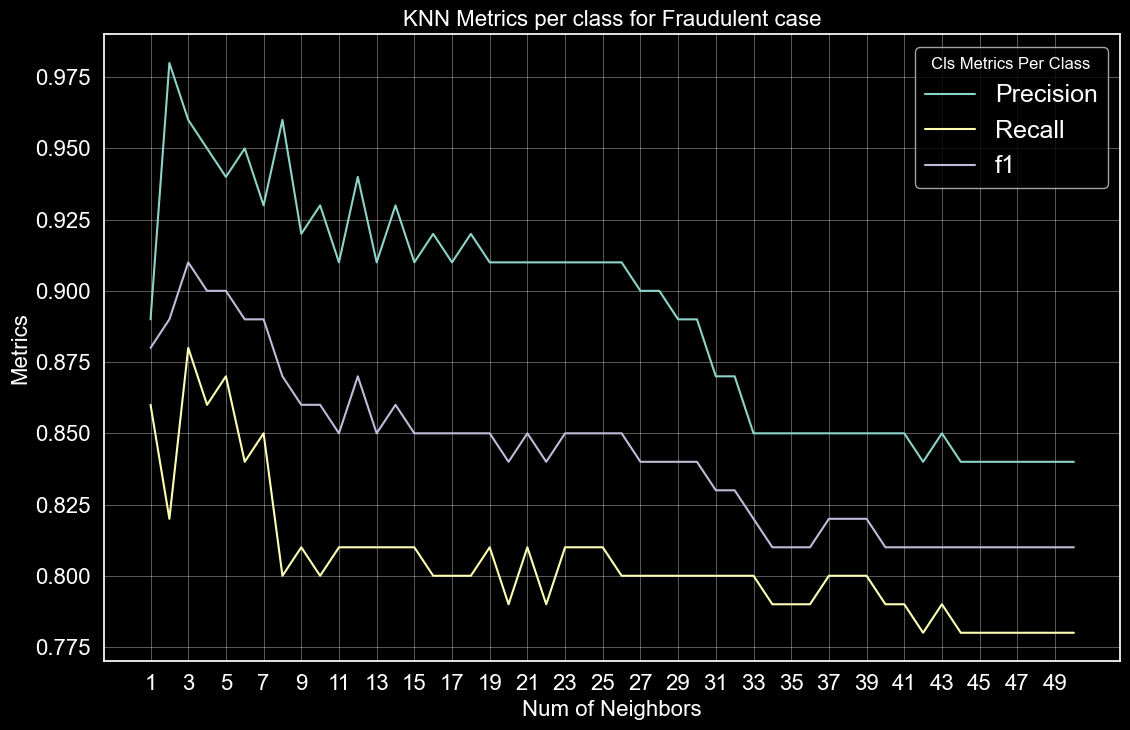

In [118]:
ax = metrics_class_knn_standard.droplevel(1, axis=1).T.plot()
ax.set(xlabel='Num of Neighbors', ylabel='Metrics')
ax.set_xticks(range(1, max_k, 2));
# plt.ylim((0.85, 1))
plt.title('KNN Metrics per class for Fraudulent case')

Contrary to the MinMaxed Input, in the Standardized Input the optimal k is 3

In [64]:
metrics_knn_standard.iloc[4:].T.iloc[2]

Cls Metrics
Bal Accuracy    0.94
Av Precision    0.84
AUC             0.94
Matthews CC     0.92
Cohen KS        0.91
Name: 3, dtype: float64

In [65]:
metrics_class_knn_standard.droplevel(1, axis=1).T.iloc[2]

Cls Metrics Per Class
Precision    0.96
Recall       0.88
f1           0.91
Name: 3, dtype: float64

### MinMaxed(k=5) vs Standardized(k=3)

In [126]:
mask_minmax = metrics_knn_minmax.columns.get_level_values(0) == 5
mask_standard = metrics_knn_standard.columns.get_level_values(0) == 3

pd.concat(
    [
        metrics_knn_minmax.loc[:, mask_minmax].iloc[3:].rename({5:'k=5(minmax)'}, axis=1),
        metrics_knn_standard.loc[:, mask_standard].iloc[3:].rename({3:'k=3(standard)'}, axis=1), 
    ],
    axis=1
)

,k=5(minmax),k=3(standard)
Cls Metrics,,
f1,0.91,0.91
Bal Accuracy,0.92,0.94
Av Precision,0.83,0.84
AUC,0.92,0.94
Matthews CC,0.91,0.92
Cohen KS,0.91,0.91


In [123]:
mask_minmax = metrics_knn_minmax.columns.get_level_values(0) == 5
mask_standard = metrics_knn_standard.columns.get_level_values(0) == 3

pd.concat(
    [
        metrics_class_knn_minmax.droplevel(1, axis=1).loc[:, mask_minmax].rename({5:'k=5(minmax)'}, axis=1),
        metrics_class_knn_standard.droplevel(1, axis=1).loc[:, mask_standard].rename({3:'k=3(standard)'}, axis=1), 
    ],
    axis=1
)

,k=5(minmax),k=3(standard)
Cls Metrics Per Class,,
Precision,0.99,0.96
Recall,0.84,0.88
f1,0.91,0.91


It seems that for the standardized data where k=5(optimal), the metrics are very slightly favorable overall.


### Final Setup

In [127]:
knn_minmax = KNeighborsClassifier(n_neighbors=5)
knn_standard = KNeighborsClassifier(n_neighbors=3)

In [128]:
knn_minmax.fit(X=Input['minmax']['X_train'], y=y_train)
knn_standard.fit(X=Input['standard']['X_train'], y=y_train)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=3)

In [129]:
pred_knn_minmax = knn_minmax.predict(X=Input['minmax']['X_test'])
pred_knn_standard = knn_standard.predict(X=Input['standard']['X_test'])

In [130]:
metric_knn_minmax = metrics_calc(y_test=y_test, y_pred=pred_knn_minmax, clsfr='knn_minmax')

In [131]:
metric_knn_standard = metrics_calc(y_test=y_test, y_pred=pred_knn_standard, clsfr='knn_standard')

In [132]:
metric_knn = pd.concat([metric_knn_minmax[0], metric_knn_standard[0]], axis=1)
metric_knn

,knn_minmax,knn_standard
Cls Metrics,,
Accuracy,1.00,1.00
Precision,0.99,0.96
Recall,0.84,0.88
f1,0.91,0.91
Bal Accuracy,0.92,0.94
Av Precision,0.83,0.84
AUC,0.92,0.94
Matthews CC,0.91,0.92
Cohen KS,0.91,0.91


In [133]:
metric_knn_class = pd.concat([metric_knn_minmax[1], metric_knn_standard[1]], axis=1)
metric_knn_class

knn_minmax        knn_standard       
                               0      1            0      1
Cls Metrics Per Class                                      
Precision                    1.0   0.99          1.0   0.96
Recall                       1.0   0.84          1.0   0.88
f1                           1.0   0.91          1.0   0.91
Support                  56864.0  98.00      56864.0  98.00

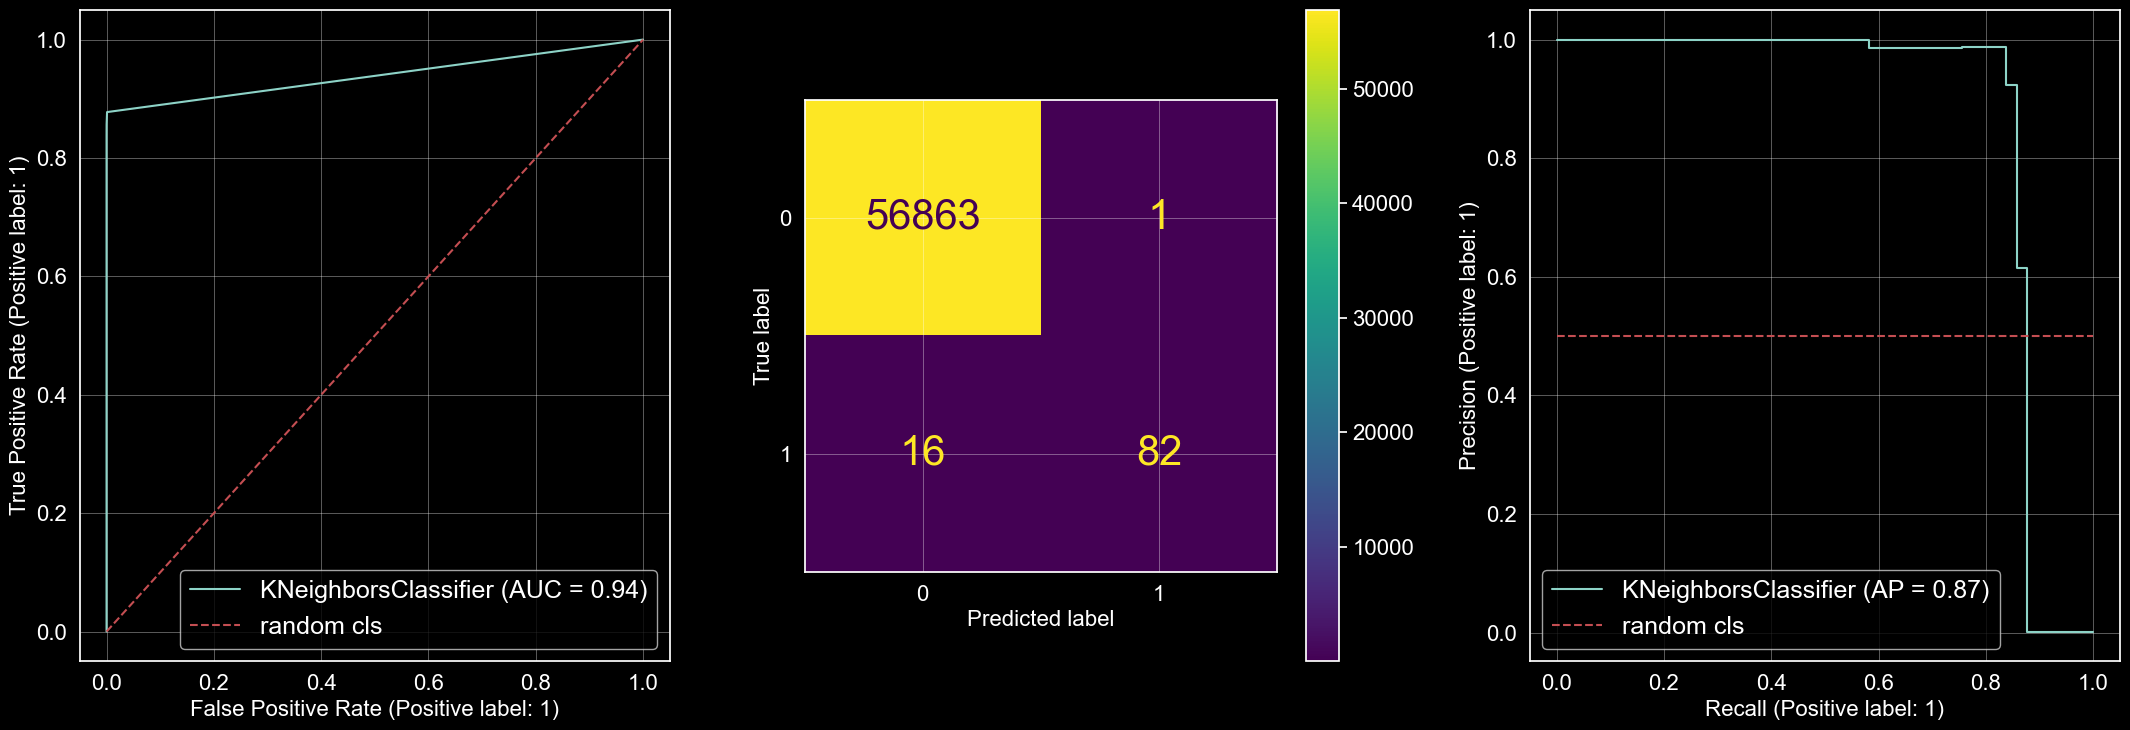

In [193]:
metrics_plot(cls=knn_minmax, X_test=Input['minmax']['X_test'], y_test=y_test);

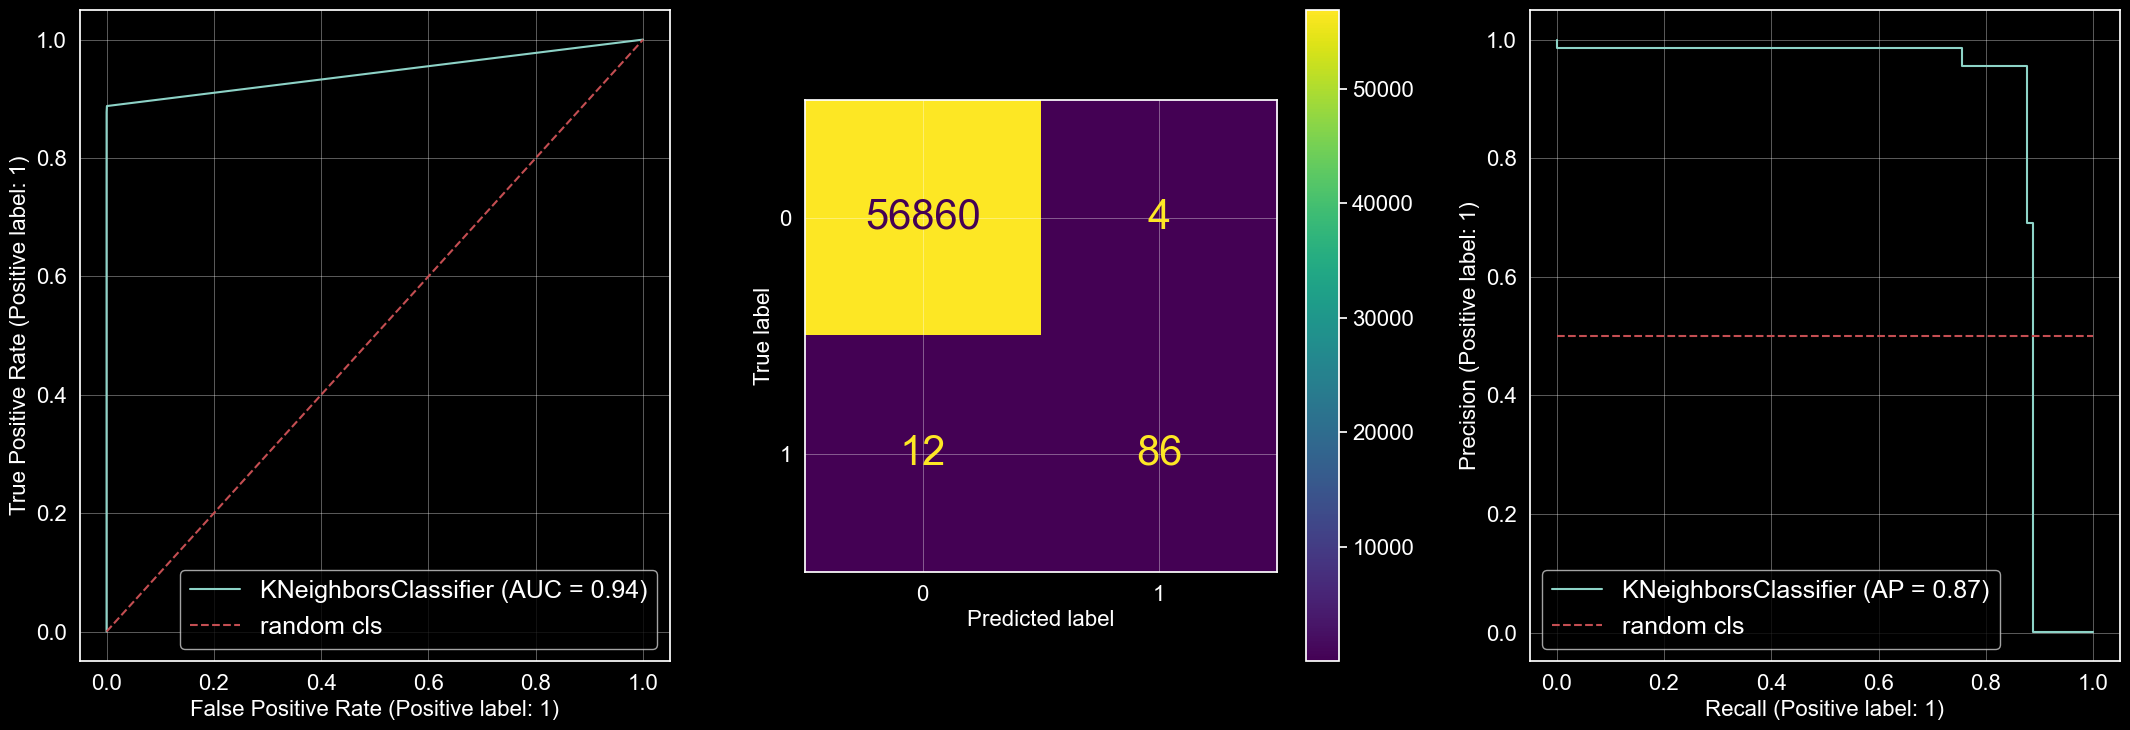

In [194]:
metrics_plot(cls=knn_standard, X_test=Input['standard']['X_test'], y_test=y_test);

Compared to the Area under the curves AUC and AP KNN(k=3) with standardized input and KNN(k=5) with MinMaxed input are exactly the same.

One can see that the difference lies in the off-diagonal elements of their confusion matrices. These slight differences practically favor the standardized version. This is exactly what our calculations indicated.

## 3.3 SVM

In [134]:
svm_minmax = svm.SVC()
svm_standard = svm.SVC()

In [135]:
svm_minmax.fit(X=Input['minmax']['X_train'], y=y_train)
svm_standard.fit(X=Input['standard']['X_train'], y=y_train)

SVC()

SVC()

In [136]:
pred_svm_minmax = svm_minmax.predict(X=Input['minmax']['X_test'])
pred_svm_standard = svm_standard.predict(X=Input['standard']['X_test'])

In [137]:
metric_svm_minmax = metrics_calc(y_test=y_test, y_pred=pred_svm_minmax, clsfr='svm_minmax')

In [138]:
metric_svm_standard = metrics_calc(y_test=y_test, y_pred=pred_svm_standard, clsfr='svm_standard')

In [139]:
metric_svm = pd.concat([metric_svm_minmax[0], metric_svm_standard[0]], axis=1)
metric_svm

,svm_minmax,svm_standard
Cls Metrics,,
Accuracy,1.00,1.00
Precision,0.84,0.96
Recall,0.86,0.77
f1,0.85,0.85
Bal Accuracy,0.93,0.88
Av Precision,0.72,0.74
AUC,0.93,0.88
Matthews CC,0.85,0.86
Cohen KS,0.85,0.85


In [140]:
metric_svm_class = pd.concat([metric_svm_minmax[1], metric_svm_standard[1]], axis=1)
metric_svm_class

svm_minmax        svm_standard       
                               0      1            0      1
Cls Metrics Per Class                                      
Precision                    1.0   0.84          1.0   0.96
Recall                       1.0   0.86          1.0   0.77
f1                           1.0   0.85          1.0   0.85
Support                  56864.0  98.00      56864.0  98.00

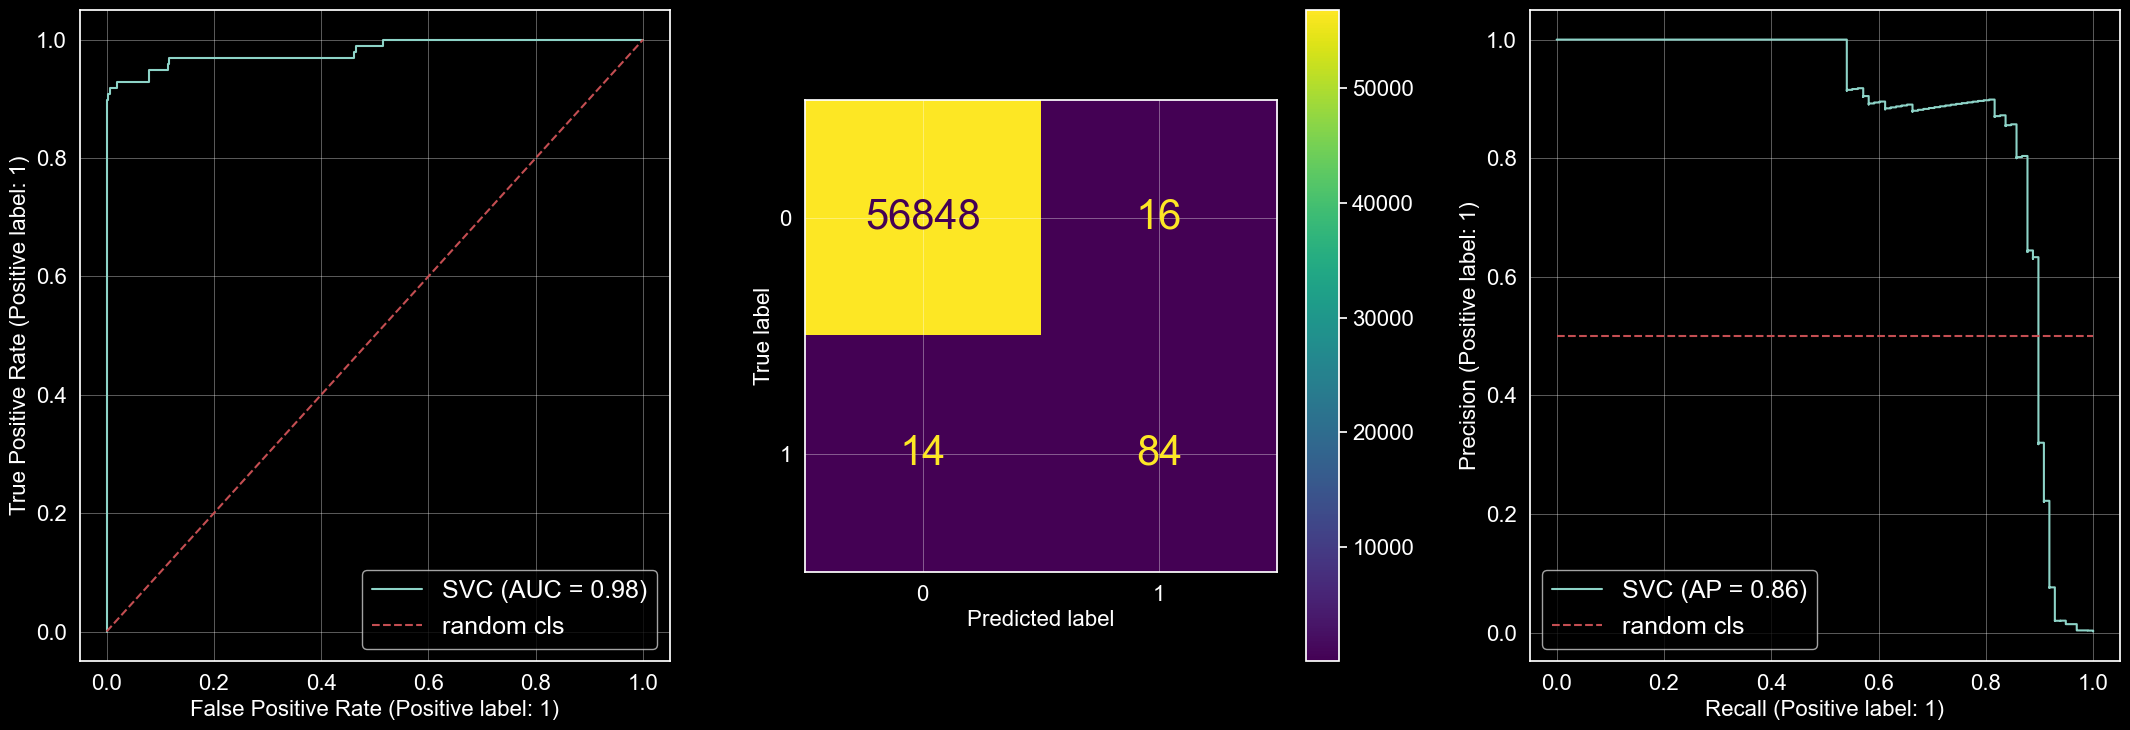

In [196]:
metrics_plot(cls=svm_minmax, X_test=Input['minmax']['X_test'], y_test=y_test);

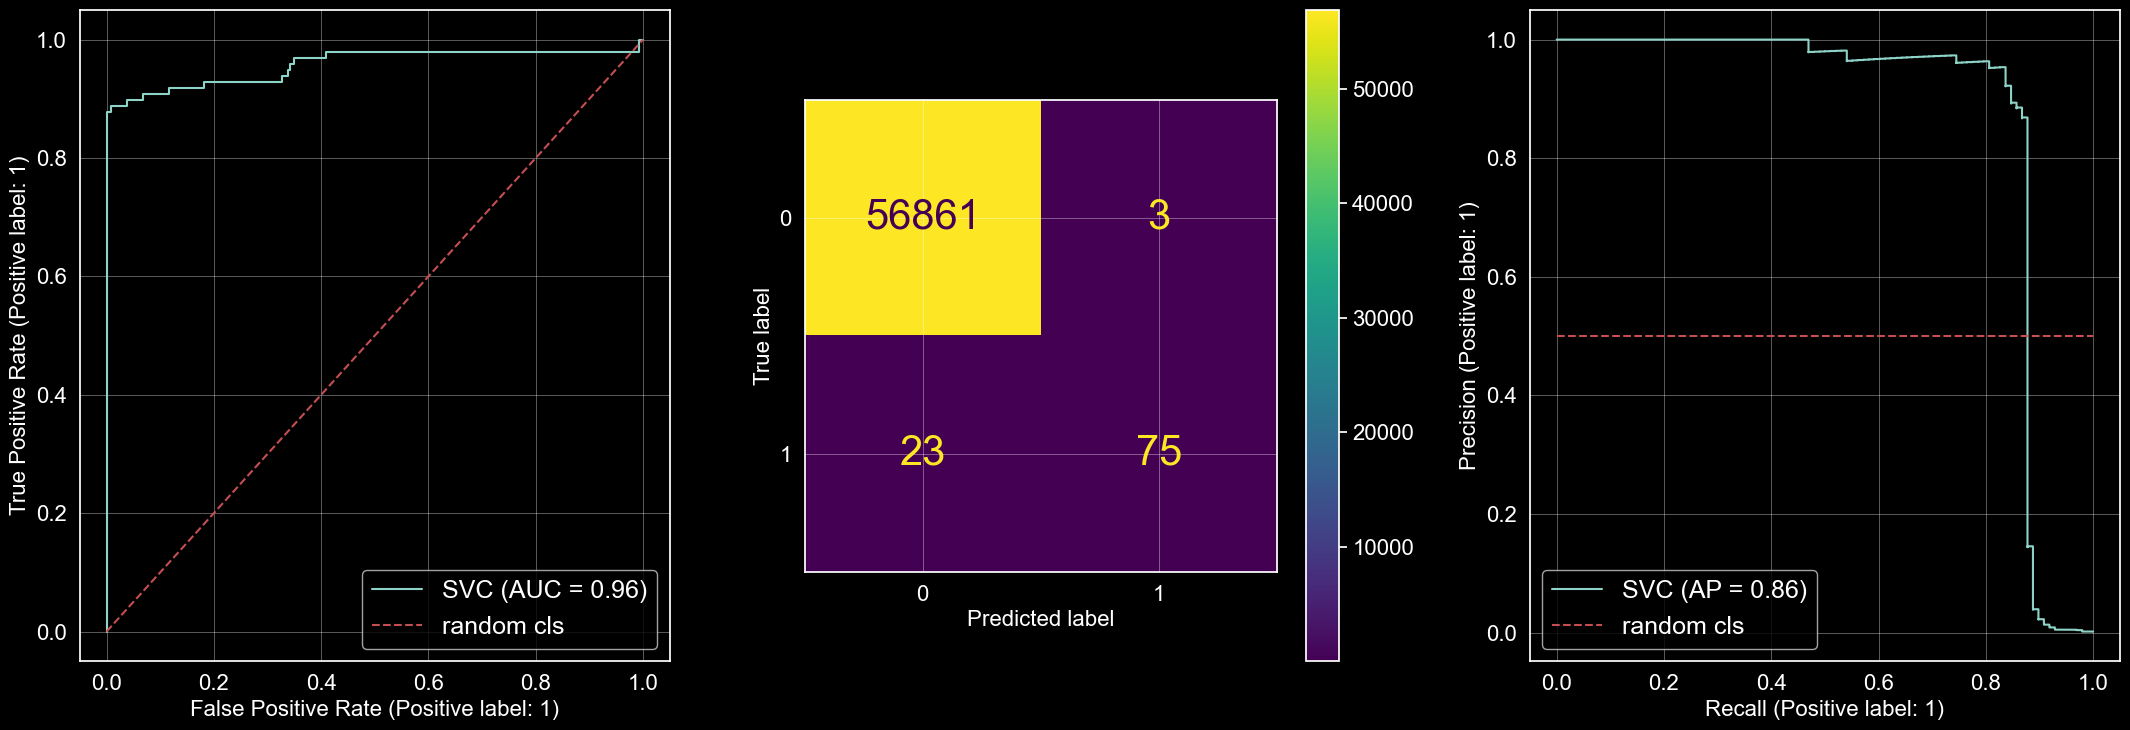

In [195]:
metrics_plot(cls=svm_standard, X_test=Input['standard']['X_test'], y_test=y_test);

Clearly the SVM instance with the MinMaxed Input is performing better, which agrees with our calculations.

# 5. Best Classifier?

First we gather all metrics and metrics per class into master dataframes

In [197]:
metrics = pd.concat([metric_log_reg, metric_knn, metric_svm], axis=1)
metrics

,log_reg_minmax,log_reg_standard,knn_minmax,knn_standard,svm_minmax,svm_standard
Cls Metrics,,,,,,
Accuracy,1.00,1.00,1.00,1.00,1.00,1.00
Precision,0.90,0.90,0.99,0.96,0.84,0.96
Recall,0.55,0.62,0.84,0.88,0.86,0.77
f1,0.68,0.73,0.91,0.91,0.85,0.85
Bal Accuracy,0.78,0.81,0.92,0.94,0.93,0.88
Av Precision,0.50,0.56,0.83,0.84,0.72,0.74
AUC,0.78,0.81,0.92,0.94,0.93,0.88
Matthews CC,0.70,0.75,0.91,0.92,0.85,0.86
Cohen KS,0.68,0.73,0.91,0.91,0.85,0.85


As extensively explained in Sec. [Metric Utils](#metric-utils), the most important metrics for our imbalanced class case are

In [198]:
metrics.iloc[4:].index.to_list()

['Bal Accuracy', 'Av Precision', 'AUC', 'Matthews CC', 'Cohen KS']

thus we will keep only those hereafter. The rest were kept for completeness and to prove that they are actually unreliable. 

In [199]:
metrics = metrics.iloc[4:]
metrics

,log_reg_minmax,log_reg_standard,knn_minmax,knn_standard,svm_minmax,svm_standard
Cls Metrics,,,,,,
Bal Accuracy,0.78,0.81,0.92,0.94,0.93,0.88
Av Precision,0.50,0.56,0.83,0.84,0.72,0.74
AUC,0.78,0.81,0.92,0.94,0.93,0.88
Matthews CC,0.70,0.75,0.91,0.92,0.85,0.86
Cohen KS,0.68,0.73,0.91,0.91,0.85,0.85


In [200]:
metrics_class = pd.concat([metric_log_reg_class, metric_knn_class, metric_svm_class], axis=1)
metrics_class

log_reg_minmax        log_reg_standard         \
                                   0      1                0      1   
Cls Metrics Per Class                                                 
Precision                        1.0   0.90              1.0   0.90   
Recall                           1.0   0.55              1.0   0.62   
f1                               1.0   0.68              1.0   0.73   
Support                      56864.0  98.00          56864.0  98.00   

                      knn_minmax        knn_standard        svm_minmax         \
                               0      1            0      1          0      1   
Cls Metrics Per Class                                                           
Precision                    1.0   0.99          1.0   0.96        1.0   0.84   
Recall                       1.0   0.84          1.0   0.88        1.0   0.86   
f1                           1.0   0.91          1.0   0.91        1.0   0.85   
Support                  56864.0  98.00      56864.0  98.00    56864.0  98.00   

                      svm_standard         
                                 0      1  
Cls Metrics Per Class                      
Precision                      1.0   0.96  
Recall                         1.0   0.77  
f1                             1.0   0.85  
Support                    56864.0  98.00

With a similar argument we will drop all 0 class columns from this dataframe since they explain nothing.

In [201]:
mask = metrics_class.columns.get_level_values(1) == 1
metrics_class = metrics_class.loc[:, mask].droplevel(1, axis=1)
metrics_class

,log_reg_minmax,log_reg_standard,knn_minmax,knn_standard,svm_minmax,svm_standard
Cls Metrics Per Class,,,,,,
Precision,0.90,0.90,0.99,0.96,0.84,0.96
Recall,0.55,0.62,0.84,0.88,0.86,0.77
f1,0.68,0.73,0.91,0.91,0.85,0.85
Support,98.00,98.00,98.00,98.00,98.00,98.00


The question which model is best will be answered in 3 steps:
1. Which model is best for MinMaxed scaled data.
2. Which model is best for Standardized scaled data.
3. Which model is best from 1 and 2.

## 5.1 Best Classifier for MinMaxed Input

We first filter out all columns related to the MinMaxScaler

In [206]:
mask = metrics.columns.str.endswith('minmax')
# array([ True, False, False, False])
metrics.loc[:,mask]

,log_reg_minmax,knn_minmax,svm_minmax
Cls Metrics,,,
Bal Accuracy,0.78,0.92,0.93
Av Precision,0.50,0.83,0.72
AUC,0.78,0.92,0.93
Matthews CC,0.70,0.91,0.85
Cohen KS,0.68,0.91,0.85


KNN seems to be overall better.

In [207]:
mask = metrics_class.columns.get_level_values(0).str.endswith('minmax')
metrics_class.loc[:, mask]

,log_reg_minmax,knn_minmax,svm_minmax
Cls Metrics Per Class,,,
Precision,0.90,0.99,0.84
Recall,0.55,0.84,0.86
f1,0.68,0.91,0.85
Support,98.00,98.00,98.00


KNN seems to greatly outperform all other models in avg precision and f1.

## 5.2 Best Classifier for Standardized Input

In [208]:
mask = metrics.columns.str.endswith('standard')
# array([ True, False, False, False])
metrics.loc[:,mask]

,log_reg_standard,knn_standard,svm_standard
Cls Metrics,,,
Bal Accuracy,0.81,0.94,0.88
Av Precision,0.56,0.84,0.74
AUC,0.81,0.94,0.88
Matthews CC,0.75,0.92,0.86
Cohen KS,0.73,0.91,0.85


In [209]:
mask = metrics_class.columns.get_level_values(0).str.endswith('standard')
metrics_class.loc[:, mask]

,log_reg_standard,knn_standard,svm_standard
Cls Metrics Per Class,,,
Precision,0.90,0.96,0.96
Recall,0.62,0.88,0.77
f1,0.73,0.91,0.85
Support,98.00,98.00,98.00


As it is evident KNN is the best all around model.

## 5.3 Best overall model

Since the choice boils down to KNN either with MinMaxed data or Standardized Input, the answer is already known from [MinMaxed(k=5) vs Standardized(k=3)](#minmaxedk5-vs-standardizedk3) : **Standardized**. 

Both of them are really close, for future reference the quality and form of the data will better diversify them. 


# 6. Summary

In this project we probed the famous [Credit card fraud dataset from Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), using Logistic Regression(LR), K Nearest Neighbors(KNN) and Support Vector Machines(SVM).

We first performed Exploratory Data Analysis on the dataset probing the imbalanced relation between fraudulent and non fraudulent cases. Then we preprocessed the data by defining our input variable X and y, as well as inducing MinMax and Standardize transformations of X.

We calculated for each model LR, KNN, SVM various metrics for each input. Special attention was given to the KNN model since optimizing it for the n_neighbors is a simple and straightforward task. 

After having performed all relevant calculations, we compared all them 
1. for MinMaxed input
2. for Standardized input
3. for best overall model 

Apparently the best overall model is KNN(k=3) and specifically with Standardized input.

# 7. Next Steps

The analysis can be further expanded to:
1. Include a lot of different parameter combinations for our models in order to optimize them.
   1. Different solvers/max_iterations for the Logistic Regression.
   2. Try different weights for the distance in K Nearest Neighbors.
   3. Testing different kernels/gamma for the Support Vector Machine classifier.
2. Split with more specialized ways the data like StratifiedKfolds etc.
3. Imbalanced classes are often dealt with with sampling techniques.Use of sampling techniques like oversampling, undersampling, SMOTE and any other combination therein. 